## Plotting Attendance

### 0. Getting Started

Start by forking this repo and cloning your fork to your computer.

### 1. Business Understanding

You want to understand when your cohort typically arrives on campus.

### 2. Data Understanding

Each of you has access to an attendance spreadsheet that now contains five days of arrival times for you and your colleagues.

### 3. Data Preparation

#### 3(a) Load the data

* Create a Jupyter Notebook.

* Load the arrival time data into Pandas from `data.csv`. 

* Decide how to deal with any missing values in the data.

#### 3(b) Visualize the data

* Create some visualizations of the attendance data. Note that it can be grouped by day or aggregated together.

* At least one of your visualizations _must_ be a histogram.

In [1]:
# import necessary package
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import necessary data 
attendance_data = pd.read_csv("data.csv", header=None, na_values="absent")

# give proper column names
attendance_data.columns = ["2019-04-01", "2019-04-02", "2019-04-03",
                           "2019-04-04", "2019-04-05", "2019-04-08"]
attendance_data.head()

,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-08
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM


# Reshape `attendance_data`

The goal is to visualize historical attendance times. It is not useful to have the time data spread out in multiple columns. Instead, reshaping the data frame from wide to long will give one two columns: one for the day and one for the time.

In [2]:
# reshape from wide to long
attendance_data = pd.melt(attendance_data)

# rename columns
attendance_data.columns = ["date", "time"]

# view results
attendance_data.head()

,date,time
0,2019-04-01,8:56 AM
1,2019-04-01,8:40 AM
2,2019-04-01,8:45 AM
3,2019-04-01,8:40 AM
4,2019-04-01,8:55 AM


In [3]:
attendance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
date    138 non-null object
time    137 non-null object
dtypes: object(2)
memory usage: 2.2+ KB


Remove the NaN record from the data frame

In [4]:
attendance_data = attendance_data.dropna()
attendance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 137
Data columns (total 2 columns):
date    137 non-null object
time    137 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


Let's convert `date` to a date object

In [5]:
attendance_data["date"] = pd.to_datetime(attendance_data["date"], format="%Y-%m-%d")
attendance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 137
Data columns (total 2 columns):
date    137 non-null datetime64[ns]
time    137 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 3.2+ KB


Let's convert `time` to a date time object

In [6]:
attendance_data["time"] = pd.to_datetime(attendance_data["time"], format="%H:%M %p")
attendance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 137
Data columns (total 2 columns):
date    137 non-null datetime64[ns]
time    137 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.2 KB


In [7]:
attendance_data.head()

,date,time
0,2019-04-01,1900-01-01 08:56:00
1,2019-04-01,1900-01-01 08:40:00
2,2019-04-01,1900-01-01 08:45:00
3,2019-04-01,1900-01-01 08:40:00
4,2019-04-01,1900-01-01 08:55:00


For visualization purposes, let's create a new columns:

- `hour`: the hour
- `minute`" the minute
- `total_time`: the time

In [9]:
attendance_data["hour"] = attendance_data["time"].dt.hour
attendance_data["minute"] = attendance_data["time"].dt.minute
attendance_data["minute_hour"] = attendance_data["minute"] / 60
attendance_data["total_time"] = attendance_data["hour"] + attendance_data["minute_hour"]
attendance_data.head()

,date,time,hour,minute,minute_hour,total_time
0,2019-04-01,1900-01-01 08:56:00,8,56,0.933333,8.933333
1,2019-04-01,1900-01-01 08:40:00,8,40,0.666667,8.666667
2,2019-04-01,1900-01-01 08:45:00,8,45,0.750000,8.750000
3,2019-04-01,1900-01-01 08:40:00,8,40,0.666667,8.666667
4,2019-04-01,1900-01-01 08:55:00,8,55,0.916667,8.916667


Visualize when students are coming to class

(array([ 1.,  0.,  4.,  0.,  7., 10.,  9.,  7., 12.,  8., 44., 11., 23.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 7.5       ,  7.61666667,  7.73333333,  7.85      ,  7.96666667,
         8.08333333,  8.2       ,  8.31666667,  8.43333333,  8.55      ,
         8.66666667,  8.78333333,  8.9       ,  9.01666667,  9.13333333,
         9.25      ,  9.36666667,  9.48333333,  9.6       ,  9.71666667,
         9.83333333,  9.95      , 10.06666667, 10.18333333, 10.3       ,
        10.41666667, 10.53333333, 10.65      , 10.76666667, 10.88333333,
        11.        ]),
 <a list of 30 Patch objects>)

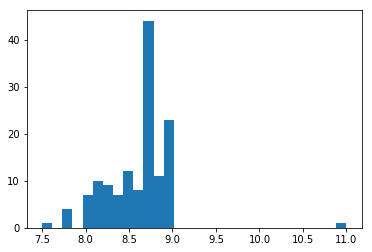

In [18]:
plt.hist(attendance_data["total_time"], bins=30)

Historically, most people show up before 9am. A lot of people tend to come just after 8:30am.